In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import os
import random

In [67]:
read_path = '../outputs/layers'
pca_info = np.load(os.path.join(read_path, 'pca_info.npz'))
tsne_info = np.load(os.path.join(read_path, 'tsne_info.npz'))

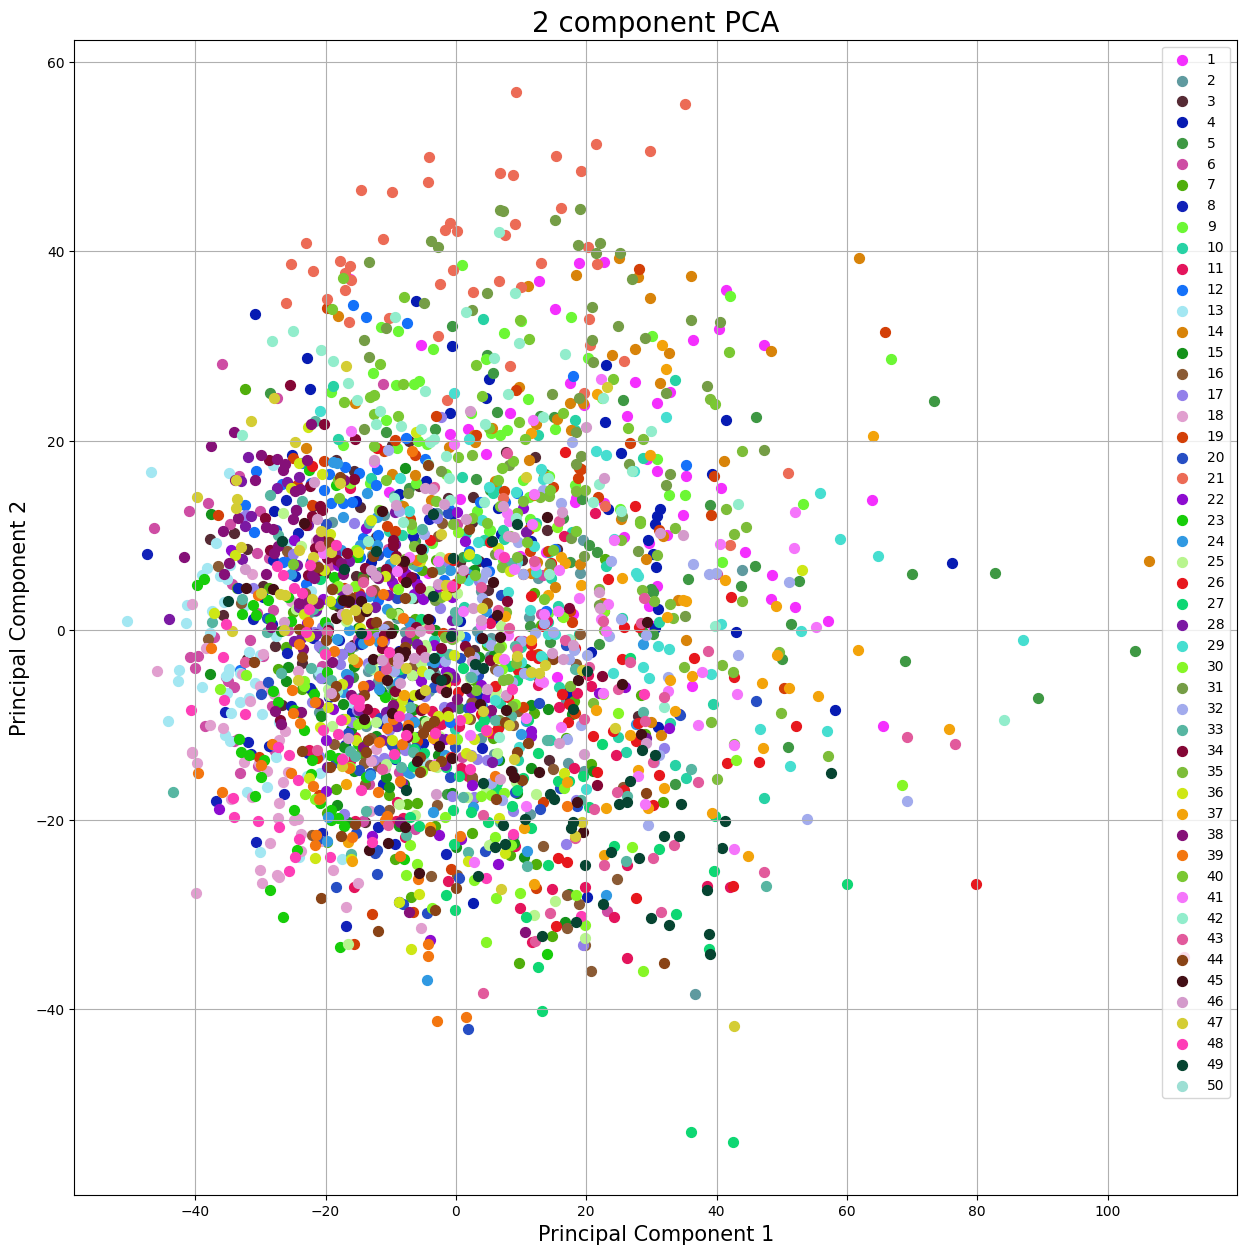

In [70]:
def PCA_plot(pca_info):

    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [i for i in range(1,51)]
    #color setting
    get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
    colors = get_colors(50)
    #read pca info
    pca_arr = pca_info['arr']
    val_lbl = pca_info['lbl']
    
    #construct df
    pca_df = pd.DataFrame(pca_arr, columns=['pc1','pc2'])
    pca_df['label'] = val_lbl

    for target, color in zip(targets,colors):
        indicesToKeep = pca_df['label'] == target
        ax.scatter(pca_df.loc[indicesToKeep, 'pc1']
                   , pca_df.loc[indicesToKeep, 'pc2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    
    save_dir = '../outputs/plots'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, 'pca_plot.png'))
    
PCA_plot(pca_info)

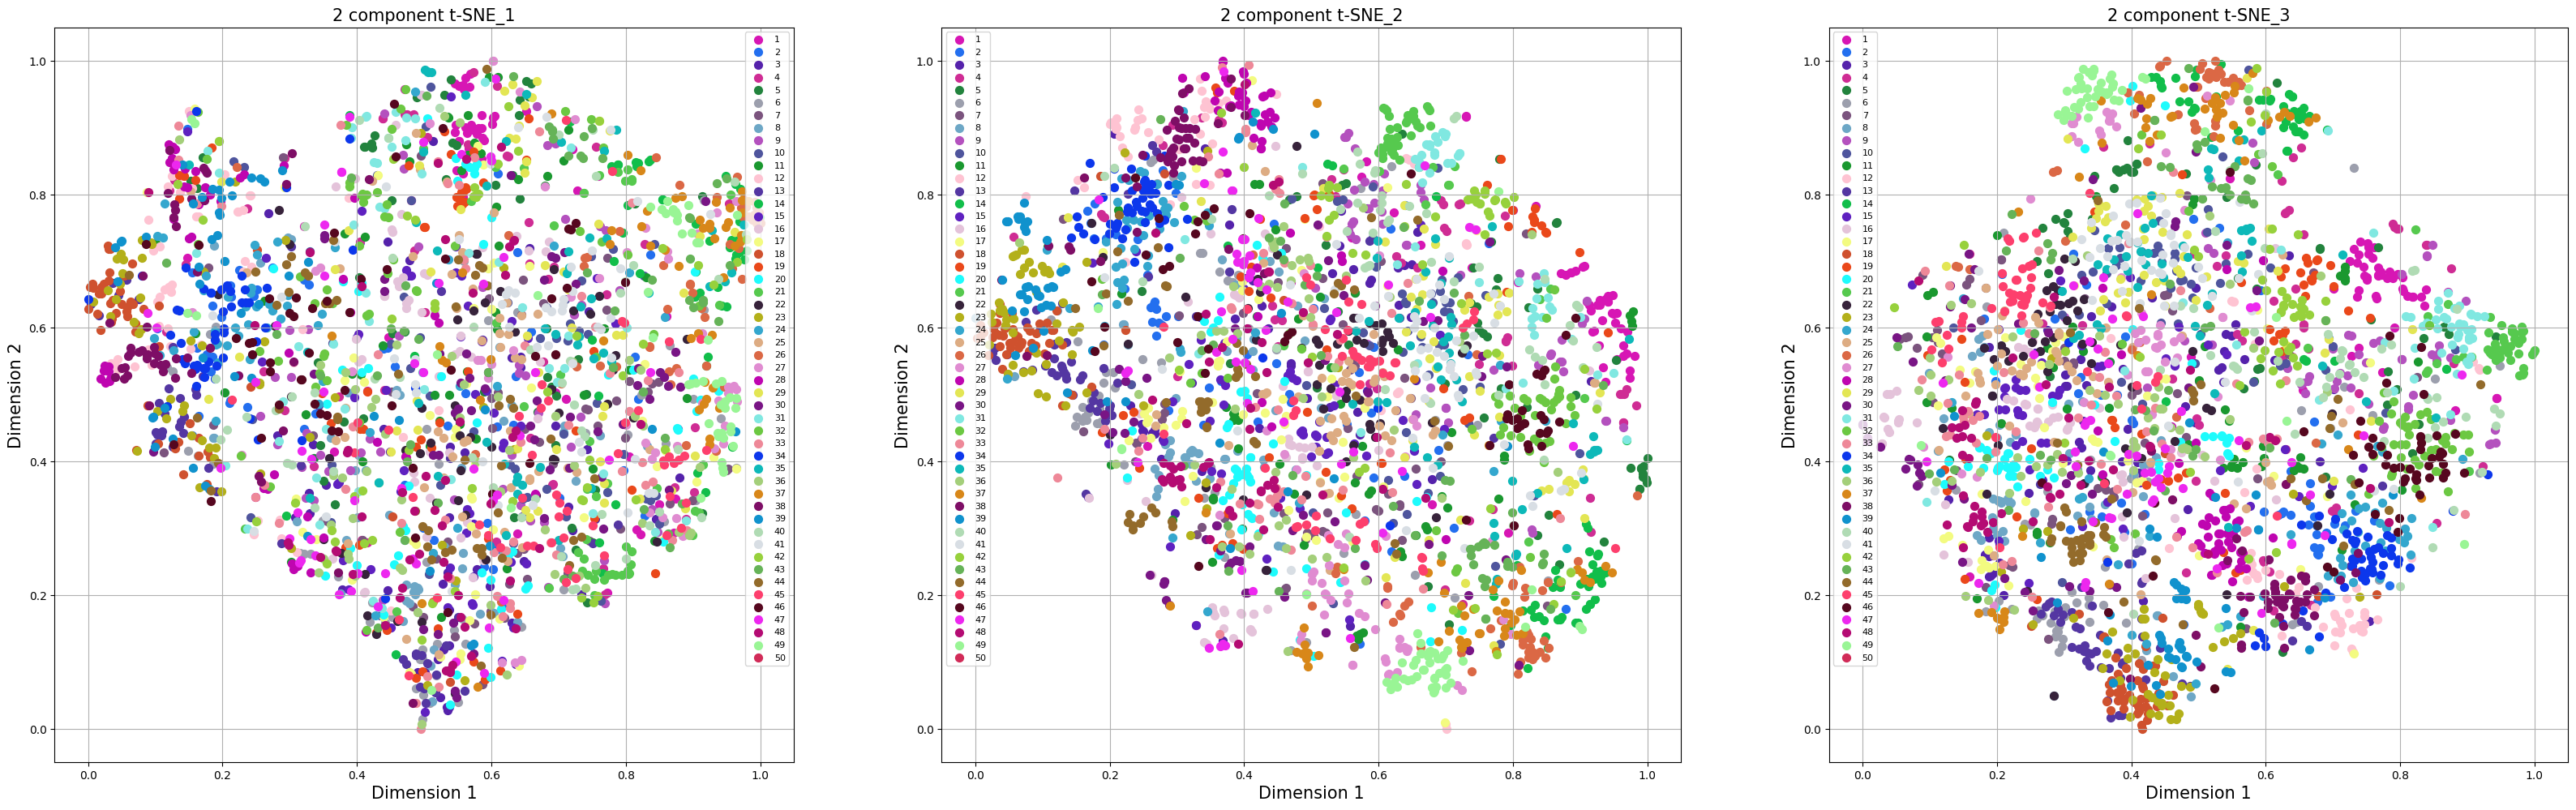

In [71]:
def tsne_plot(tsne_info):

    fig = plt.figure(figsize = (40,40))
    targets = [i for i in range(1,51)]
    #color setting
    get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
    colors = get_colors(50)
    
    #read pca info
    epoch_names = ['tsne_1', 'tsne_2', 'tsne_3']
    val_lbl = tsne_info['lbl']
    num = 1
    for name in epoch_names:
        
        tsne_arr = tsne_info[name]

        #construct df
        tsne_df = pd.DataFrame(tsne_arr, columns=['pc1','pc2'])
        tsne_df['label'] = val_lbl
        ax = plt.subplot(3,3,num)
        for target, color in zip(targets,colors):
            indicesToKeep = tsne_df['label'] == target
            ax.scatter(tsne_df.loc[indicesToKeep, 'pc1']
                       , tsne_df.loc[indicesToKeep, 'pc2']
                       , c = color
                       , s = 50)
            
        ax.set_xlabel('Dimension 1', fontsize = 15)
        ax.set_ylabel('Dimension 2', fontsize = 15)
        ax.set_title(f'2 component t-SNE_{num}', fontsize = 15)
        ax.legend(targets, fontsize=8)
        ax.grid()
        
        save_dir = '../outputs/plots'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        num += 1
    plt.savefig(os.path.join(save_dir, f'tsne_plot.png'))
    plt.show()
    
tsne_plot(tsne_info)